In [2]:
from matplotlib.pyplot import imshow
from IPython.display import display
from PIL import Image, ImageOps, ImageFilter, ImageEnhance, ImageChops
import cv2
import numpy as np
import glob, os

In [3]:
ls ..

data/    LICENSE.txt*  README.md*  test.py*   zizi-data/
docker/  models/       scripts/    train.py*  zizi-scripts/
imgs/    options/      script.sh   util/


In [10]:

# src = Image.open('results/test_img/000050.png')
# src2 = src.resize((960,1080))
# display(src2)

def add_margin(pil_img, top, right, bottom, left, color):
    width, height = pil_img.size
    new_width = width + right + left
    new_height = height + top + bottom
    result = Image.new(pil_img.mode, (new_width, new_height), color)
    result.paste(pil_img, (left, top))
    return result

def make_img(im):
    # CV make invert BW
#     im = cv2.imread('../zizi-data/datasets/acts/full/test_densepose/fiveyears-ruby-full/005001_IUV.png')
#     print(im.shape)
    im = cv2.resize(im, (832, 832)) # 832
#     display(im)

#     print(im.shape)
    im = im/255.0
    im_power_law_transformation = cv2.pow(im,0.01)
    im_PIL = Image.fromarray((im_power_law_transformation * 255).astype(np.uint8))
#     display(Image.fromarray((im * 255).astype(np.uint8)))
    im_invert = ImageOps.invert(im_PIL).convert('L')

    # make sil

    blur1 = im_invert.filter(ImageFilter.GaussianBlur(radius=2))
    im_sil = add_margin(blur1, 0, 100, 30, 0, color='#FFFFFF')
    # display(im_sil)

    # makeshadow

    blur = im_invert.filter(ImageFilter.GaussianBlur(radius=10)) #25

    enhancer = ImageEnhance.Contrast(blur)
    im_shadow = enhancer.enhance(1.3)
    im_shadow = add_margin(im_shadow, 30, 0, 0, 100, color='#FFFFFF')
    final_img = ImageChops.multiply(im_shadow, im_sil)
#     print(final_img.size)
    # display(final_img)


    cutoff = 580
    warpNum = 300

    img = np.array(im_shadow)

#     print(img.shape)

    pts1 = np.float32(
        [[0, cutoff],
         [832, cutoff],
         [0, 900],
         [832, 900]]
    )
    pts2 = np.float32(
        [[0, cutoff],
         [832, cutoff],
         [-warpNum, 800],
         [832-warpNum, 800]]
    )    
    M = cv2.getPerspectiveTransform(pts1,pts2)
    dst = cv2.warpPerspective(img, M, (932, 862), cv2.INTER_LINEAR, borderValue=(255))

    btmsdw = Image.fromarray((dst).astype(np.uint8))
#     print(btmsdw.size)
    btmsdw_crp = btmsdw.crop((0, cutoff, 932, 862))
    btmsdw_crp_tp = add_margin(btmsdw_crp, cutoff, 0, 0, 0, color='#FFFFFF')
    btmsdw_crp_tp_br = btmsdw_crp_tp.filter(ImageFilter.GaussianBlur(radius=15))

#     print(im_shadow.size)
    sdw1_crp = im_shadow.crop((0, 0, 932, 862-(862-cutoff+30)+50))
    sdw1_crp_tp = add_margin(sdw1_crp, 0, 0, (862-cutoff)+50, 0, color='#FFFFFF')
    sdw1_crp_tp_br = sdw1_crp_tp.filter(ImageFilter.GaussianBlur(radius=25))

    shadow_mix = ImageChops.multiply(sdw1_crp_tp_br, btmsdw_crp_tp_br)




    # Make final


    final_img_comp = ImageChops.multiply(shadow_mix, im_sil)
    final_img = final_img_comp.crop((0, 0, 832, 832)) 
#     print(final_img.size)

    return  final_img
#     display(final_img)



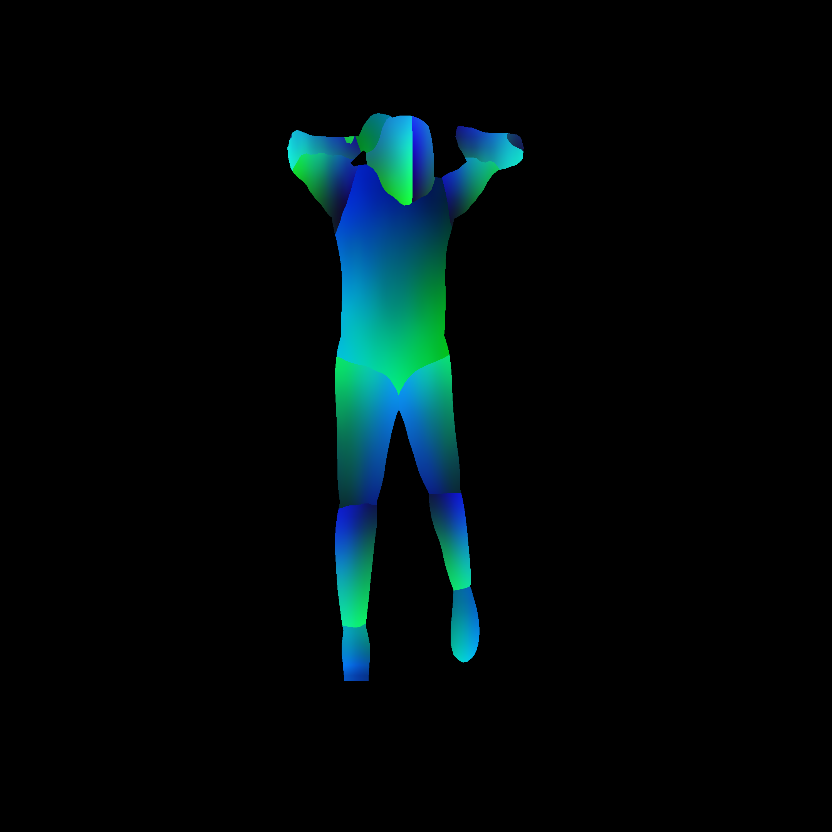

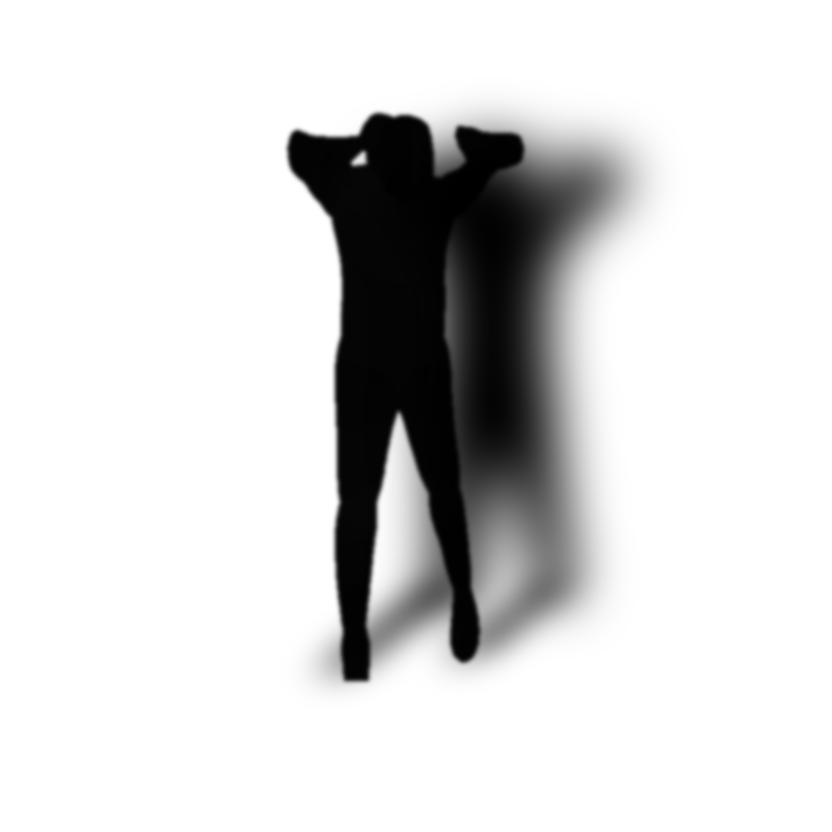

In [5]:
im = cv2.imread('../zizi-data/datasets/acts/full/test_densepose/fiveyears-ruby-full/005001_IUV.png')
display(make_img(im))


In [200]:
!rm -rf ../zizi-data/datasets/acts/full/test_shadow/*

In [12]:
# directory = "fiveyears-ruby-full"
# ../zizi-data/datasets/acts/full/test_densepose/fiveyears-ruby-full/005001_IUV.png

for d in sorted(glob.glob("../zizi-data/datasets/acts/full/test_densepose/[hsag]*")):
    print(os.path.basename(d))
    directory = os.path.basename(d)
    
    sdir = "../zizi-data/datasets/acts/full/test_shadow/"+directory+"/"

    if not os.path.exists(sdir):
        os.mkdir(sdir)

    for file in sorted(glob.glob("../zizi-data/datasets/acts/full/test_densepose/"+directory+"/*.png")):
        name = os.path.basename(file).replace('_IUV.png','')
        print(file)

        im = cv2.imread(file)
        
        make_img(im).save(sdir+name+".png")

aintro-full
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000001_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000002_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000003_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000004_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000005_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000006_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000007_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000008_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000009_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000010_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000011_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000012_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000013_IUV.png
../zizi-data/datasets/acts

../zizi-data/datasets/acts/full/test_densepose/aintro-full/000112_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000113_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000114_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000115_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000116_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000117_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000118_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000119_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000120_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000121_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000122_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000123_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000124_IUV.png
../zizi-data/datasets/acts/full/test_d

../zizi-data/datasets/acts/full/test_densepose/aintro-full/000224_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000225_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000226_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000227_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000228_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000229_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000230_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000231_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000232_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000233_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000234_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000235_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000236_IUV.png
../zizi-data/datasets/acts/full/test_d

../zizi-data/datasets/acts/full/test_densepose/aintro-full/000336_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000337_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000338_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000339_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000340_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000341_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000342_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000343_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000344_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000345_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000346_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000347_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000348_IUV.png
../zizi-data/datasets/acts/full/test_d

../zizi-data/datasets/acts/full/test_densepose/aintro-full/000447_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000448_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000449_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000450_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000451_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000452_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000453_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000454_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000455_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000456_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000457_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000458_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000459_IUV.png
../zizi-data/datasets/acts/full/test_d

../zizi-data/datasets/acts/full/test_densepose/aintro-full/000558_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000559_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000560_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000561_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000562_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000563_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000564_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000565_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000566_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000567_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000568_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000569_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000570_IUV.png
../zizi-data/datasets/acts/full/test_d

../zizi-data/datasets/acts/full/test_densepose/aintro-full/000669_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000670_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000671_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000672_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000673_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000674_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000675_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000676_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000677_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000678_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000679_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000680_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000681_IUV.png
../zizi-data/datasets/acts/full/test_d

../zizi-data/datasets/acts/full/test_densepose/aintro-full/000780_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000781_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000782_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000783_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000784_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000785_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000786_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000787_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000788_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000789_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000790_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000791_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000792_IUV.png
../zizi-data/datasets/acts/full/test_d

../zizi-data/datasets/acts/full/test_densepose/aintro-full/000892_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000893_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000894_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000895_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000896_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000897_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000898_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000899_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000900_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000901_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000902_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000903_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/000904_IUV.png
../zizi-data/datasets/acts/full/test_d

../zizi-data/datasets/acts/full/test_densepose/aintro-full/001003_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001004_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001005_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001006_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001007_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001008_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001009_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001010_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001011_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001012_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001013_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001014_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001015_IUV.png
../zizi-data/datasets/acts/full/test_d

../zizi-data/datasets/acts/full/test_densepose/aintro-full/001114_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001115_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001116_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001117_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001118_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001119_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001120_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001121_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001122_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001123_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001124_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001125_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001126_IUV.png
../zizi-data/datasets/acts/full/test_d

../zizi-data/datasets/acts/full/test_densepose/aintro-full/001225_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001226_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001227_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001228_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001229_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001230_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001231_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001232_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001233_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001234_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001235_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001236_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001237_IUV.png
../zizi-data/datasets/acts/full/test_d

../zizi-data/datasets/acts/full/test_densepose/aintro-full/001337_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001338_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001339_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001340_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001341_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001342_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001343_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001344_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001345_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001346_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001347_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001348_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001349_IUV.png
../zizi-data/datasets/acts/full/test_d

../zizi-data/datasets/acts/full/test_densepose/aintro-full/001449_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001450_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001451_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001452_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001453_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001454_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001455_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001456_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001457_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001458_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001459_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001460_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001461_IUV.png
../zizi-data/datasets/acts/full/test_d

../zizi-data/datasets/acts/full/test_densepose/aintro-full/001561_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001562_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001563_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001564_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001565_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001566_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001567_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001568_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001569_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001570_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001571_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001572_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001573_IUV.png
../zizi-data/datasets/acts/full/test_d

../zizi-data/datasets/acts/full/test_densepose/aintro-full/001673_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001674_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001675_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001676_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001677_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001678_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001679_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001680_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001681_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001682_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001683_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001684_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001685_IUV.png
../zizi-data/datasets/acts/full/test_d

../zizi-data/datasets/acts/full/test_densepose/aintro-full/001785_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001786_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001787_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001788_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001789_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001790_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001791_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001792_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001793_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001794_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001795_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001796_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001797_IUV.png
../zizi-data/datasets/acts/full/test_d

../zizi-data/datasets/acts/full/test_densepose/aintro-full/001897_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001898_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001899_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001900_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001901_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001902_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001903_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001904_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001905_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001906_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001907_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001908_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/001909_IUV.png
../zizi-data/datasets/acts/full/test_d

../zizi-data/datasets/acts/full/test_densepose/aintro-full/002008_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002009_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002010_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002011_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002012_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002013_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002014_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002015_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002016_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002017_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002018_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002019_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002020_IUV.png
../zizi-data/datasets/acts/full/test_d

../zizi-data/datasets/acts/full/test_densepose/aintro-full/002119_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002120_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002121_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002122_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002123_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002124_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002125_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002126_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002127_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002128_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002129_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002130_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002131_IUV.png
../zizi-data/datasets/acts/full/test_d

../zizi-data/datasets/acts/full/test_densepose/aintro-full/002230_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002231_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002232_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002233_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002234_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002235_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002236_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002237_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002238_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002239_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002240_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002241_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002242_IUV.png
../zizi-data/datasets/acts/full/test_d

../zizi-data/datasets/acts/full/test_densepose/aintro-full/002341_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002342_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002343_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002344_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002345_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002346_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002347_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002348_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002349_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002350_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002351_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002352_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002353_IUV.png
../zizi-data/datasets/acts/full/test_d

../zizi-data/datasets/acts/full/test_densepose/aintro-full/002452_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002453_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002454_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002455_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002456_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002457_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002458_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002459_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002460_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002461_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002462_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002463_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002464_IUV.png
../zizi-data/datasets/acts/full/test_d

../zizi-data/datasets/acts/full/test_densepose/aintro-full/002563_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002564_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002565_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002566_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002567_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002568_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002569_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002570_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002571_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002572_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002573_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002574_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002575_IUV.png
../zizi-data/datasets/acts/full/test_d

../zizi-data/datasets/acts/full/test_densepose/aintro-full/002675_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002676_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002677_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002678_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002679_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002680_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002681_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002682_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002683_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002684_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002685_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002686_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002687_IUV.png
../zizi-data/datasets/acts/full/test_d

../zizi-data/datasets/acts/full/test_densepose/aintro-full/002787_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002788_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002789_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002790_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002791_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002792_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002793_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002794_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002795_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002796_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002797_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002798_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002799_IUV.png
../zizi-data/datasets/acts/full/test_d

../zizi-data/datasets/acts/full/test_densepose/aintro-full/002898_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002899_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002900_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002901_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002902_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002903_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002904_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002905_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002906_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002907_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002908_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002909_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/002910_IUV.png
../zizi-data/datasets/acts/full/test_d

../zizi-data/datasets/acts/full/test_densepose/aintro-full/003010_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003011_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003012_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003013_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003014_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003015_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003016_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003017_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003018_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003019_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003020_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003021_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003022_IUV.png
../zizi-data/datasets/acts/full/test_d

../zizi-data/datasets/acts/full/test_densepose/aintro-full/003122_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003123_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003124_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003125_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003126_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003127_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003128_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003129_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003130_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003131_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003132_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003133_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003134_IUV.png
../zizi-data/datasets/acts/full/test_d

../zizi-data/datasets/acts/full/test_densepose/aintro-full/003234_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003235_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003236_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003237_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003238_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003239_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003240_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003241_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003242_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003243_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003244_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003245_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003246_IUV.png
../zizi-data/datasets/acts/full/test_d

../zizi-data/datasets/acts/full/test_densepose/aintro-full/003346_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003347_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003348_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003349_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003350_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003351_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003352_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003353_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003354_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003355_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003356_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003357_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003358_IUV.png
../zizi-data/datasets/acts/full/test_d

../zizi-data/datasets/acts/full/test_densepose/aintro-full/003458_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003459_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003460_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003461_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003462_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003463_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003464_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003465_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003466_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003467_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003468_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003469_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003470_IUV.png
../zizi-data/datasets/acts/full/test_d

../zizi-data/datasets/acts/full/test_densepose/aintro-full/003570_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003571_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003572_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003573_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003574_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003575_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003576_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003577_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003578_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003579_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003580_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003581_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003582_IUV.png
../zizi-data/datasets/acts/full/test_d

../zizi-data/datasets/acts/full/test_densepose/aintro-full/003682_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003683_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003684_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003685_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003686_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003687_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003688_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003689_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003690_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003691_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003692_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003693_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003694_IUV.png
../zizi-data/datasets/acts/full/test_d

../zizi-data/datasets/acts/full/test_densepose/aintro-full/003794_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003795_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003796_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003797_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003798_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003799_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003800_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003801_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003802_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003803_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003804_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003805_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003806_IUV.png
../zizi-data/datasets/acts/full/test_d

../zizi-data/datasets/acts/full/test_densepose/aintro-full/003906_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003907_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003908_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003909_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003910_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003911_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003912_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003913_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003914_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003915_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003916_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003917_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/003918_IUV.png
../zizi-data/datasets/acts/full/test_d

../zizi-data/datasets/acts/full/test_densepose/aintro-full/004017_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004018_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004019_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004020_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004021_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004022_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004023_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004024_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004025_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004026_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004027_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004028_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004029_IUV.png
../zizi-data/datasets/acts/full/test_d

../zizi-data/datasets/acts/full/test_densepose/aintro-full/004129_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004130_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004131_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004132_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004133_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004134_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004135_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004136_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004137_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004138_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004139_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004140_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004141_IUV.png
../zizi-data/datasets/acts/full/test_d

../zizi-data/datasets/acts/full/test_densepose/aintro-full/004241_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004242_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004243_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004244_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004245_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004246_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004247_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004248_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004249_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004250_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004251_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004252_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004253_IUV.png
../zizi-data/datasets/acts/full/test_d

../zizi-data/datasets/acts/full/test_densepose/aintro-full/004352_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004353_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004354_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004355_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004356_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004357_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004358_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004359_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004360_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004361_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004362_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004363_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004364_IUV.png
../zizi-data/datasets/acts/full/test_d

../zizi-data/datasets/acts/full/test_densepose/aintro-full/004464_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004465_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004466_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004467_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004468_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004469_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004470_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004471_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004472_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004473_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004474_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004475_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004476_IUV.png
../zizi-data/datasets/acts/full/test_d

../zizi-data/datasets/acts/full/test_densepose/aintro-full/004576_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004577_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004578_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004579_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004580_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004581_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004582_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004583_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004584_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004585_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004586_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004587_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004588_IUV.png
../zizi-data/datasets/acts/full/test_d

../zizi-data/datasets/acts/full/test_densepose/aintro-full/004688_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004689_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004690_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004691_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004692_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004693_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004694_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004695_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004696_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004697_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004698_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004699_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004700_IUV.png
../zizi-data/datasets/acts/full/test_d

../zizi-data/datasets/acts/full/test_densepose/aintro-full/004800_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004801_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004802_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004803_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004804_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004805_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004806_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004807_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004808_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004809_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004810_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004811_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004812_IUV.png
../zizi-data/datasets/acts/full/test_d

../zizi-data/datasets/acts/full/test_densepose/aintro-full/004912_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004913_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004914_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004915_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004916_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004917_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004918_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004919_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004920_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004921_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004922_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004923_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/004924_IUV.png
../zizi-data/datasets/acts/full/test_d

../zizi-data/datasets/acts/full/test_densepose/aintro-full/005023_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005024_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005025_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005026_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005027_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005028_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005029_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005030_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005031_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005032_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005033_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005034_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005035_IUV.png
../zizi-data/datasets/acts/full/test_d

../zizi-data/datasets/acts/full/test_densepose/aintro-full/005135_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005136_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005137_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005138_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005139_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005140_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005141_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005142_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005143_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005144_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005145_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005146_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005147_IUV.png
../zizi-data/datasets/acts/full/test_d

../zizi-data/datasets/acts/full/test_densepose/aintro-full/005247_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005248_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005249_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005250_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005251_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005252_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005253_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005254_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005255_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005256_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005257_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005258_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005259_IUV.png
../zizi-data/datasets/acts/full/test_d

../zizi-data/datasets/acts/full/test_densepose/aintro-full/005359_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005360_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005361_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005362_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005363_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005364_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005365_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005366_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005367_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005368_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005369_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005370_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005371_IUV.png
../zizi-data/datasets/acts/full/test_d

../zizi-data/datasets/acts/full/test_densepose/aintro-full/005471_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005472_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005473_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005474_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005475_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005476_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005477_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005478_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005479_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005480_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005481_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005482_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005483_IUV.png
../zizi-data/datasets/acts/full/test_d

../zizi-data/datasets/acts/full/test_densepose/aintro-full/005583_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005584_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005585_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005586_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005587_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005588_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005589_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005590_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005591_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005592_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005593_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005594_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005595_IUV.png
../zizi-data/datasets/acts/full/test_d

../zizi-data/datasets/acts/full/test_densepose/aintro-full/005695_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005696_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005697_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005698_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005699_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005700_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005701_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005702_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005703_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005704_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005705_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005706_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005707_IUV.png
../zizi-data/datasets/acts/full/test_d

../zizi-data/datasets/acts/full/test_densepose/aintro-full/005807_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005808_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005809_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005810_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005811_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005812_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005813_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005814_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005815_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005816_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005817_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005818_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005819_IUV.png
../zizi-data/datasets/acts/full/test_d

../zizi-data/datasets/acts/full/test_densepose/aintro-full/005919_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005920_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005921_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005922_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005923_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005924_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005925_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005926_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005927_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005928_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005929_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005930_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/005931_IUV.png
../zizi-data/datasets/acts/full/test_d

../zizi-data/datasets/acts/full/test_densepose/aintro-full/006031_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/006032_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/006033_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/006034_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/006035_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/006036_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/006037_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/006038_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/006039_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/006040_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/006041_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/006042_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/006043_IUV.png
../zizi-data/datasets/acts/full/test_d

../zizi-data/datasets/acts/full/test_densepose/aintro-full/006143_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/006144_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/006145_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/006146_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/006147_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/006148_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/006149_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/006150_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/006151_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/006152_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/006153_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/006154_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/006155_IUV.png
../zizi-data/datasets/acts/full/test_d

../zizi-data/datasets/acts/full/test_densepose/aintro-full/006255_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/006256_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/006257_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/006258_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/006259_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/006260_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/006261_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/006262_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/006263_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/006264_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/006265_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/006266_IUV.png
../zizi-data/datasets/acts/full/test_densepose/aintro-full/006267_IUV.png
../zizi-data/datasets/acts/full/test_d

../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000062_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000063_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000064_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000065_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000066_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000067_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000068_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000069_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000070_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000071_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000072_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000073_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass

../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000166_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000167_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000168_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000169_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000170_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000171_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000172_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000173_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000174_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000175_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000176_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000177_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass

../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000270_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000271_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000272_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000273_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000274_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000275_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000276_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000277_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000278_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000279_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000280_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000281_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass

../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000374_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000375_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000376_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000377_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000378_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000379_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000380_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000381_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000382_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000383_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000384_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000385_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass

../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000478_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000479_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000480_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000481_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000482_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000483_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000484_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000485_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000486_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000487_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000488_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000489_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass

../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000582_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000583_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000584_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000585_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000586_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000587_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000588_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000589_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000590_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000591_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000592_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000593_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass

../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000687_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000688_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000689_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000690_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000691_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000692_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000693_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000694_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000695_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000696_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000697_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000698_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass

../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000791_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000792_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000793_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000794_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000795_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000796_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000797_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000798_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000799_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000800_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000801_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000802_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass

../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000895_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000896_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000897_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000898_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000899_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000900_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000901_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000902_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000903_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000904_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000905_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000906_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass

../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/000999_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001000_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001001_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001002_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001003_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001004_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001005_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001006_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001007_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001008_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001009_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001010_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass

../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001103_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001104_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001105_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001106_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001107_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001108_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001109_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001110_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001111_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001112_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001113_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001114_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass

../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001208_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001209_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001210_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001211_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001212_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001213_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001214_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001215_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001216_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001217_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001218_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001219_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass

../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001312_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001313_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001314_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001315_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001316_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001317_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001318_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001319_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001320_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001321_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001322_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001323_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass

../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001416_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001417_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001418_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001419_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001420_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001421_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001422_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001423_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001424_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001425_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001426_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001427_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass

../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001520_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001521_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001522_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001523_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001524_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001525_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001526_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001527_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001528_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001529_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001530_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001531_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass

../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001625_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001626_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001627_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001628_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001629_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001630_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001631_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001632_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001633_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001634_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001635_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001636_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass

../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001730_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001731_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001732_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001733_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001734_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001735_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001736_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001737_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001738_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001739_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001740_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001741_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass

../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001834_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001835_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001836_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001837_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001838_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001839_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001840_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001841_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001842_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001843_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001844_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001845_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass

../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001938_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001939_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001940_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001941_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001942_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001943_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001944_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001945_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001946_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001947_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001948_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/001949_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass

../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002042_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002043_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002044_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002045_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002046_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002047_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002048_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002049_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002050_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002051_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002052_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002053_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass

../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002147_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002148_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002149_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002150_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002151_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002152_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002153_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002154_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002155_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002156_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002157_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002158_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass

../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002251_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002252_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002253_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002254_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002255_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002256_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002257_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002258_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002259_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002260_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002261_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002262_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass

../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002355_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002356_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002357_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002358_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002359_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002360_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002361_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002362_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002363_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002364_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002365_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002366_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass

../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002459_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002460_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002461_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002462_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002463_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002464_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002465_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002466_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002467_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002468_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002469_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002470_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass

../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002563_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002564_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002565_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002566_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002567_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002568_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002569_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002570_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002571_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002572_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002573_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002574_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass

../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002667_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002668_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002669_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002670_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002671_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002672_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002673_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002674_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002675_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002676_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002677_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002678_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass

../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002771_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002772_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002773_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002774_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002775_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002776_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002777_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002778_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002779_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002780_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002781_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002782_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass

../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002876_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002877_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002878_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002879_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002880_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002881_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002882_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002883_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002884_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002885_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002886_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002887_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass

../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002981_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002982_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002983_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002984_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002985_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002986_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002987_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002988_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002989_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002990_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002991_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/002992_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass

../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003086_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003087_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003088_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003089_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003090_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003091_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003092_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003093_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003094_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003095_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003096_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003097_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass

../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003191_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003192_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003193_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003194_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003195_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003196_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003197_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003198_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003199_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003200_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003201_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003202_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass

../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003295_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003296_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003297_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003298_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003299_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003300_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003301_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003302_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003303_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003304_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003305_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003306_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass

../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003400_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003401_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003402_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003403_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003404_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003405_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003406_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003407_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003408_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003409_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003410_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003411_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass

../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003505_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003506_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003507_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003508_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003509_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003510_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003511_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003512_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003513_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003514_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003515_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003516_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass

../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003609_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003610_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003611_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003612_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003613_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003614_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003615_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003616_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003617_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003618_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003619_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003620_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass

../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003713_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003714_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003715_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003716_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003717_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003718_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003719_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003720_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003721_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003722_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003723_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003724_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass

../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003817_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003818_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003819_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003820_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003821_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003822_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003823_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003824_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003825_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003826_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003827_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003828_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass

../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003922_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003923_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003924_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003925_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003926_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003927_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003928_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003929_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003930_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003931_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003932_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/003933_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass

../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004026_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004027_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004028_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004029_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004030_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004031_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004032_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004033_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004034_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004035_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004036_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004037_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass

../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004130_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004131_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004132_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004133_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004134_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004135_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004136_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004137_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004138_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004139_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004140_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004141_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass

../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004234_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004235_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004236_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004237_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004238_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004239_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004240_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004241_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004242_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004243_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004244_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004245_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass

../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004338_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004339_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004340_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004341_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004342_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004343_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004344_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004345_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004346_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004347_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004348_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004349_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass

../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004442_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004443_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004444_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004445_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004446_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004447_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004448_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004449_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004450_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004451_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004452_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004453_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass

../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004547_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004548_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004549_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004550_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004551_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004552_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004553_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004554_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004555_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004556_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004557_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004558_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass

../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004652_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004653_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004654_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004655_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004656_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004657_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004658_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004659_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004660_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004661_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004662_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004663_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass

../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004756_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004757_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004758_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004759_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004760_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004761_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004762_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004763_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004764_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004765_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004766_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004767_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass

../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004860_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004861_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004862_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004863_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004864_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004865_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004866_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004867_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004868_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004869_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004870_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004871_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass

../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004965_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004966_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004967_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004968_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004969_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004970_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004971_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004972_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004973_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004974_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004975_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/004976_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass

../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/005070_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/005071_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/005072_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/005073_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/005074_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/005075_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/005076_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/005077_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/005078_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/005079_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/005080_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass-lilly-full/005081_IUV.png
../zizi-data/datasets/acts/full/test_densepose/glass

../zizi-data/datasets/acts/full/test_densepose/hosting-full/000045_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000046_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000047_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000048_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000049_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000050_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000051_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000052_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000053_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000054_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000055_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000056_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000057_IUV.png
../zizi-data/datasets/act

../zizi-data/datasets/acts/full/test_densepose/hosting-full/000155_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000156_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000157_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000158_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000159_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000160_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000161_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000162_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000163_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000164_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000165_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000166_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000167_IUV.png
../zizi-data/datasets/act

../zizi-data/datasets/acts/full/test_densepose/hosting-full/000265_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000266_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000267_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000268_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000269_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000270_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000271_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000272_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000273_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000274_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000275_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000276_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000277_IUV.png
../zizi-data/datasets/act

../zizi-data/datasets/acts/full/test_densepose/hosting-full/000375_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000376_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000377_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000378_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000379_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000380_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000381_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000382_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000383_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000384_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000385_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000386_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000387_IUV.png
../zizi-data/datasets/act

../zizi-data/datasets/acts/full/test_densepose/hosting-full/000485_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000486_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000487_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000488_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000489_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000490_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000491_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000492_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000493_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000494_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000495_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000496_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000497_IUV.png
../zizi-data/datasets/act

../zizi-data/datasets/acts/full/test_densepose/hosting-full/000595_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000596_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000597_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000598_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000599_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000600_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000601_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000602_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000603_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000604_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000605_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000606_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000607_IUV.png
../zizi-data/datasets/act

../zizi-data/datasets/acts/full/test_densepose/hosting-full/000705_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000706_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000707_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000708_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000709_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000710_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000711_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000712_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000713_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000714_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000715_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000716_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000717_IUV.png
../zizi-data/datasets/act

../zizi-data/datasets/acts/full/test_densepose/hosting-full/000815_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000816_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000817_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000818_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000819_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000820_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000821_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000822_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000823_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000824_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000825_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000826_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000827_IUV.png
../zizi-data/datasets/act

../zizi-data/datasets/acts/full/test_densepose/hosting-full/000925_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000926_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000927_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000928_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000929_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000930_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000931_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000932_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000933_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000934_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000935_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000936_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/000937_IUV.png
../zizi-data/datasets/act

../zizi-data/datasets/acts/full/test_densepose/hosting-full/001035_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001036_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001037_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001038_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001039_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001040_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001041_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001042_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001043_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001044_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001045_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001046_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001047_IUV.png
../zizi-data/datasets/act

../zizi-data/datasets/acts/full/test_densepose/hosting-full/001145_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001146_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001147_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001148_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001149_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001150_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001151_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001152_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001153_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001154_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001155_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001156_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001157_IUV.png
../zizi-data/datasets/act

../zizi-data/datasets/acts/full/test_densepose/hosting-full/001255_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001256_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001257_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001258_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001259_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001260_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001261_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001262_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001263_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001264_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001265_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001266_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001267_IUV.png
../zizi-data/datasets/act

../zizi-data/datasets/acts/full/test_densepose/hosting-full/001365_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001366_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001367_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001368_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001369_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001370_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001371_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001372_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001373_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001374_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001375_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001376_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001377_IUV.png
../zizi-data/datasets/act

../zizi-data/datasets/acts/full/test_densepose/hosting-full/001475_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001476_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001477_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001478_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001479_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001480_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001481_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001482_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001483_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001484_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001485_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001486_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001487_IUV.png
../zizi-data/datasets/act

../zizi-data/datasets/acts/full/test_densepose/hosting-full/001585_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001586_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001587_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001588_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001589_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001590_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001591_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001592_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001593_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001594_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001595_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001596_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001597_IUV.png
../zizi-data/datasets/act

../zizi-data/datasets/acts/full/test_densepose/hosting-full/001695_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001696_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001697_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001698_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001699_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001700_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001701_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001702_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001703_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001704_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001705_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001706_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001707_IUV.png
../zizi-data/datasets/act

../zizi-data/datasets/acts/full/test_densepose/hosting-full/001806_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001807_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001808_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001809_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001810_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001811_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001812_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001813_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001814_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001815_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001816_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001817_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001818_IUV.png
../zizi-data/datasets/act

../zizi-data/datasets/acts/full/test_densepose/hosting-full/001917_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001918_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001919_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001920_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001921_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001922_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001923_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001924_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001925_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001926_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001927_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001928_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/001929_IUV.png
../zizi-data/datasets/act

../zizi-data/datasets/acts/full/test_densepose/hosting-full/002027_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002028_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002029_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002030_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002031_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002032_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002033_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002034_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002035_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002036_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002037_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002038_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002039_IUV.png
../zizi-data/datasets/act

../zizi-data/datasets/acts/full/test_densepose/hosting-full/002137_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002138_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002139_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002140_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002141_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002142_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002143_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002144_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002145_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002146_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002147_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002148_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002149_IUV.png
../zizi-data/datasets/act

../zizi-data/datasets/acts/full/test_densepose/hosting-full/002247_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002248_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002249_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002250_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002251_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002252_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002253_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002254_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002255_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002256_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002257_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002258_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002259_IUV.png
../zizi-data/datasets/act

../zizi-data/datasets/acts/full/test_densepose/hosting-full/002357_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002358_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002359_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002360_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002361_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002362_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002363_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002364_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002365_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002366_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002367_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002368_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002369_IUV.png
../zizi-data/datasets/act

../zizi-data/datasets/acts/full/test_densepose/hosting-full/002467_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002468_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002469_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002470_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002471_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002472_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002473_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002474_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002475_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002476_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002477_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002478_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002479_IUV.png
../zizi-data/datasets/act

../zizi-data/datasets/acts/full/test_densepose/hosting-full/002577_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002578_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002579_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002580_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002581_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002582_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002583_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002584_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002585_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002586_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002587_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002588_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002589_IUV.png
../zizi-data/datasets/act

../zizi-data/datasets/acts/full/test_densepose/hosting-full/002688_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002689_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002690_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002691_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002692_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002693_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002694_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002695_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002696_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002697_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002698_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002699_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002700_IUV.png
../zizi-data/datasets/act

../zizi-data/datasets/acts/full/test_densepose/hosting-full/002798_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002799_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002800_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002801_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002802_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002803_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002804_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002805_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002806_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002807_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002808_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002809_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002810_IUV.png
../zizi-data/datasets/act

../zizi-data/datasets/acts/full/test_densepose/hosting-full/002908_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002909_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002910_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002911_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002912_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002913_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002914_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002915_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002916_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002917_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002918_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002919_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/002920_IUV.png
../zizi-data/datasets/act

../zizi-data/datasets/acts/full/test_densepose/hosting-full/003018_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003019_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003020_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003021_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003022_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003023_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003024_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003025_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003026_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003027_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003028_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003029_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003030_IUV.png
../zizi-data/datasets/act

../zizi-data/datasets/acts/full/test_densepose/hosting-full/003128_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003129_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003130_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003131_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003132_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003133_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003134_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003135_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003136_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003137_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003138_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003139_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003140_IUV.png
../zizi-data/datasets/act

../zizi-data/datasets/acts/full/test_densepose/hosting-full/003238_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003239_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003240_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003241_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003242_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003243_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003244_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003245_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003246_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003247_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003248_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003249_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003250_IUV.png
../zizi-data/datasets/act

../zizi-data/datasets/acts/full/test_densepose/hosting-full/003348_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003349_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003350_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003351_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003352_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003353_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003354_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003355_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003356_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003357_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003358_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003359_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003360_IUV.png
../zizi-data/datasets/act

../zizi-data/datasets/acts/full/test_densepose/hosting-full/003458_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003459_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003460_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003461_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003462_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003463_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003464_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003465_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003466_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003467_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003468_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003469_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003470_IUV.png
../zizi-data/datasets/act

../zizi-data/datasets/acts/full/test_densepose/hosting-full/003568_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003569_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003570_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003571_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003572_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003573_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003574_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003575_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003576_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003577_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003578_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003579_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003580_IUV.png
../zizi-data/datasets/act

../zizi-data/datasets/acts/full/test_densepose/hosting-full/003678_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003679_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003680_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003681_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003682_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003683_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003684_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003685_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003686_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003687_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003688_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003689_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003690_IUV.png
../zizi-data/datasets/act

../zizi-data/datasets/acts/full/test_densepose/hosting-full/003788_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003789_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003790_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003791_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003792_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003793_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003794_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003795_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003796_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003797_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003798_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003799_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003800_IUV.png
../zizi-data/datasets/act

../zizi-data/datasets/acts/full/test_densepose/hosting-full/003898_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003899_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003900_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003901_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003902_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003903_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003904_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003905_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003906_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003907_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003908_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003909_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/003910_IUV.png
../zizi-data/datasets/act

../zizi-data/datasets/acts/full/test_densepose/hosting-full/004008_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004009_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004010_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004011_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004012_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004013_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004014_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004015_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004016_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004017_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004018_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004019_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004020_IUV.png
../zizi-data/datasets/act

../zizi-data/datasets/acts/full/test_densepose/hosting-full/004118_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004119_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004120_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004121_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004122_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004123_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004124_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004125_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004126_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004127_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004128_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004129_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004130_IUV.png
../zizi-data/datasets/act

../zizi-data/datasets/acts/full/test_densepose/hosting-full/004229_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004230_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004231_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004232_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004233_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004234_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004235_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004236_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004237_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004238_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004239_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004240_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004241_IUV.png
../zizi-data/datasets/act

../zizi-data/datasets/acts/full/test_densepose/hosting-full/004339_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004340_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004341_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004342_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004343_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004344_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004345_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004346_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004347_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004348_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004349_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004350_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004351_IUV.png
../zizi-data/datasets/act

../zizi-data/datasets/acts/full/test_densepose/hosting-full/004449_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004450_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004451_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004452_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004453_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004454_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004455_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004456_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004457_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004458_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004459_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004460_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004461_IUV.png
../zizi-data/datasets/act

../zizi-data/datasets/acts/full/test_densepose/hosting-full/004559_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004560_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004561_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004562_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004563_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004564_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004565_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004566_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004567_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004568_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004569_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004570_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004571_IUV.png
../zizi-data/datasets/act

../zizi-data/datasets/acts/full/test_densepose/hosting-full/004669_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004670_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004671_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004672_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004673_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004674_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004675_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004676_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004677_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004678_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004679_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004680_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004681_IUV.png
../zizi-data/datasets/act

../zizi-data/datasets/acts/full/test_densepose/hosting-full/004779_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004780_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004781_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004782_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004783_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004784_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004785_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004786_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004787_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004788_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004789_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004790_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004791_IUV.png
../zizi-data/datasets/act

../zizi-data/datasets/acts/full/test_densepose/hosting-full/004889_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004890_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004891_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004892_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004893_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004894_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004895_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004896_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004897_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004898_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004899_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004900_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/004901_IUV.png
../zizi-data/datasets/act

../zizi-data/datasets/acts/full/test_densepose/hosting-full/004999_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005000_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005001_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005002_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005003_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005004_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005005_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005006_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005007_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005008_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005009_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005010_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005011_IUV.png
../zizi-data/datasets/act

../zizi-data/datasets/acts/full/test_densepose/hosting-full/005109_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005110_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005111_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005112_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005113_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005114_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005115_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005116_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005117_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005118_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005119_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005120_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005121_IUV.png
../zizi-data/datasets/act

../zizi-data/datasets/acts/full/test_densepose/hosting-full/005219_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005220_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005221_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005222_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005223_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005224_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005225_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005226_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005227_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005228_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005229_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005230_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005231_IUV.png
../zizi-data/datasets/act

../zizi-data/datasets/acts/full/test_densepose/hosting-full/005329_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005330_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005331_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005332_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005333_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005334_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005335_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005336_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005337_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005338_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005339_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005340_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005341_IUV.png
../zizi-data/datasets/act

../zizi-data/datasets/acts/full/test_densepose/hosting-full/005439_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005440_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005441_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005442_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005443_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005444_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005445_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005446_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005447_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005448_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005449_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005450_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005451_IUV.png
../zizi-data/datasets/act

../zizi-data/datasets/acts/full/test_densepose/hosting-full/005549_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005550_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005551_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005552_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005553_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005554_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005555_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005556_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005557_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005558_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005559_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005560_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005561_IUV.png
../zizi-data/datasets/act

../zizi-data/datasets/acts/full/test_densepose/hosting-full/005659_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005660_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005661_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005662_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005663_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005664_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005665_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005666_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005667_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005668_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005669_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005670_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005671_IUV.png
../zizi-data/datasets/act

../zizi-data/datasets/acts/full/test_densepose/hosting-full/005770_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005771_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005772_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005773_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005774_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005775_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005776_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005777_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005778_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005779_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005780_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005781_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005782_IUV.png
../zizi-data/datasets/act

../zizi-data/datasets/acts/full/test_densepose/hosting-full/005880_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005881_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005882_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005883_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005884_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005885_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005886_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005887_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005888_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005889_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005890_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005891_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005892_IUV.png
../zizi-data/datasets/act

../zizi-data/datasets/acts/full/test_densepose/hosting-full/005990_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005991_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005992_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005993_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005994_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005995_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005996_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005997_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005998_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/005999_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006000_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006001_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006002_IUV.png
../zizi-data/datasets/act

../zizi-data/datasets/acts/full/test_densepose/hosting-full/006100_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006101_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006102_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006103_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006104_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006105_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006106_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006107_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006108_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006109_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006110_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006111_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006112_IUV.png
../zizi-data/datasets/act

../zizi-data/datasets/acts/full/test_densepose/hosting-full/006210_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006211_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006212_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006213_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006214_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006215_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006216_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006217_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006218_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006219_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006220_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006221_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006222_IUV.png
../zizi-data/datasets/act

../zizi-data/datasets/acts/full/test_densepose/hosting-full/006320_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006321_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006322_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006323_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006324_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006325_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006326_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006327_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006328_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006329_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006330_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006331_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006332_IUV.png
../zizi-data/datasets/act

../zizi-data/datasets/acts/full/test_densepose/hosting-full/006430_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006431_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006432_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006433_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006434_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006435_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006436_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006437_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006438_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006439_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006440_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006441_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006442_IUV.png
../zizi-data/datasets/act

../zizi-data/datasets/acts/full/test_densepose/hosting-full/006540_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006541_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006542_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006543_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006544_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006545_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006546_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006547_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006548_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006549_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006550_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006551_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006552_IUV.png
../zizi-data/datasets/act

../zizi-data/datasets/acts/full/test_densepose/hosting-full/006650_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006651_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006652_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006653_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006654_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006655_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006656_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006657_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006658_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006659_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006660_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006661_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006662_IUV.png
../zizi-data/datasets/act

../zizi-data/datasets/acts/full/test_densepose/hosting-full/006760_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006761_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006762_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006763_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006764_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006765_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006766_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006767_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006768_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006769_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006770_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006771_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006772_IUV.png
../zizi-data/datasets/act

../zizi-data/datasets/acts/full/test_densepose/hosting-full/006870_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006871_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006872_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006873_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006874_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006875_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006876_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006877_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006878_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006879_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006880_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006881_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006882_IUV.png
../zizi-data/datasets/act

../zizi-data/datasets/acts/full/test_densepose/hosting-full/006980_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006981_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006982_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006983_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006984_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006985_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006986_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006987_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006988_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006989_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006990_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006991_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/006992_IUV.png
../zizi-data/datasets/act

../zizi-data/datasets/acts/full/test_densepose/hosting-full/007090_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007091_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007092_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007093_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007094_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007095_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007096_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007097_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007098_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007099_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007100_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007101_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007102_IUV.png
../zizi-data/datasets/act

../zizi-data/datasets/acts/full/test_densepose/hosting-full/007200_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007201_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007202_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007203_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007204_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007205_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007206_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007207_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007208_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007209_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007210_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007211_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007212_IUV.png
../zizi-data/datasets/act

../zizi-data/datasets/acts/full/test_densepose/hosting-full/007310_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007311_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007312_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007313_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007314_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007315_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007316_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007317_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007318_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007319_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007320_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007321_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007322_IUV.png
../zizi-data/datasets/act

../zizi-data/datasets/acts/full/test_densepose/hosting-full/007420_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007421_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007422_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007423_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007424_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007425_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007426_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007427_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007428_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007429_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007430_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007431_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007432_IUV.png
../zizi-data/datasets/act

../zizi-data/datasets/acts/full/test_densepose/hosting-full/007530_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007531_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007532_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007533_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007534_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007535_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007536_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007537_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007538_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007539_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007540_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007541_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007542_IUV.png
../zizi-data/datasets/act

../zizi-data/datasets/acts/full/test_densepose/hosting-full/007640_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007641_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007642_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007643_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007644_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007645_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007646_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007647_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007648_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007649_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007650_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007651_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007652_IUV.png
../zizi-data/datasets/act

../zizi-data/datasets/acts/full/test_densepose/hosting-full/007750_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007751_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007752_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007753_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007754_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007755_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007756_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007757_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007758_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007759_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007760_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007761_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007762_IUV.png
../zizi-data/datasets/act

../zizi-data/datasets/acts/full/test_densepose/hosting-full/007860_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007861_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007862_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007863_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007864_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007865_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007866_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007867_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007868_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007869_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007870_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007871_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007872_IUV.png
../zizi-data/datasets/act

../zizi-data/datasets/acts/full/test_densepose/hosting-full/007970_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007971_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007972_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007973_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007974_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007975_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007976_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007977_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007978_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007979_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007980_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007981_IUV.png
../zizi-data/datasets/acts/full/test_densepose/hosting-full/007982_IUV.png
../zizi-data/datasets/act

../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000004_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000005_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000006_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000007_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000008_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000009_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000010_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000011_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000012_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000013_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000014_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000015_

../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000103_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000104_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000105_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000106_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000107_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000108_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000109_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000110_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000111_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000112_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000113_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000114_

../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000201_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000202_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000203_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000204_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000205_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000206_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000207_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000208_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000209_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000210_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000211_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000212_

../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000299_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000300_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000301_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000302_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000303_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000304_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000305_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000306_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000307_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000308_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000309_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000310_

../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000397_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000398_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000399_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000400_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000401_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000402_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000403_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000404_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000405_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000406_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000407_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000408_

../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000495_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000496_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000497_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000498_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000499_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000500_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000501_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000502_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000503_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000504_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000505_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000506_

../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000593_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000594_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000595_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000596_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000597_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000598_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000599_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000600_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000601_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000602_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000603_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000604_

../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000691_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000692_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000693_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000694_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000695_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000696_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000697_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000698_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000699_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000700_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000701_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000702_

../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000789_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000790_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000791_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000792_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000793_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000794_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000795_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000796_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000797_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000798_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000799_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000800_

../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000888_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000889_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000890_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000891_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000892_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000893_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000894_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000895_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000896_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000897_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000898_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000899_

../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000987_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000988_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000989_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000990_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000991_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000992_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000993_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000994_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000995_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000996_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000997_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/000998_

../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001086_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001087_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001088_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001089_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001090_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001091_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001092_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001093_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001094_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001095_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001096_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001097_

../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001185_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001186_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001187_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001188_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001189_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001190_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001191_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001192_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001193_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001194_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001195_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001196_

../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001284_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001285_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001286_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001287_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001288_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001289_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001290_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001291_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001292_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001293_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001294_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001295_

../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001382_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001383_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001384_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001385_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001386_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001387_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001388_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001389_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001390_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001391_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001392_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001393_

../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001480_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001481_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001482_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001483_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001484_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001485_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001486_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001487_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001488_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001489_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001490_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001491_

../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001579_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001580_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001581_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001582_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001583_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001584_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001585_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001586_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001587_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001588_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001589_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001590_

../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001677_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001678_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001679_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001680_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001681_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001682_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001683_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001684_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001685_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001686_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001687_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001688_

../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001776_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001777_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001778_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001779_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001780_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001781_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001782_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001783_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001784_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001785_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001786_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001787_

../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001874_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001875_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001876_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001877_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001878_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001879_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001880_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001881_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001882_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001883_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001884_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001885_

../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001972_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001973_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001974_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001975_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001976_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001977_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001978_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001979_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001980_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001981_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001982_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/001983_

../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002071_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002072_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002073_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002074_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002075_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002076_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002077_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002078_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002079_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002080_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002081_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002082_

../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002170_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002171_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002172_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002173_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002174_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002175_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002176_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002177_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002178_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002179_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002180_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002181_

../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002268_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002269_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002270_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002271_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002272_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002273_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002274_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002275_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002276_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002277_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002278_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002279_

../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002367_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002368_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002369_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002370_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002371_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002372_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002373_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002374_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002375_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002376_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002377_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002378_

../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002465_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002466_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002467_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002468_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002469_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002470_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002471_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002472_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002473_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002474_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002475_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002476_

../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002563_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002564_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002565_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002566_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002567_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002568_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002569_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002570_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002571_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002572_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002573_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002574_

../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002661_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002662_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002663_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002664_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002665_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002666_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002667_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002668_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002669_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002670_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002671_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002672_

../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002759_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002760_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002761_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002762_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002763_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002764_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002765_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002766_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002767_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002768_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002769_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002770_

../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002857_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002858_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002859_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002860_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002861_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002862_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002863_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002864_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002865_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002866_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002867_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002868_

../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002955_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002956_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002957_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002958_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002959_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002960_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002961_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002962_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002963_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002964_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002965_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/002966_

../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003053_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003054_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003055_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003056_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003057_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003058_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003059_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003060_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003061_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003062_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003063_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003064_

../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003152_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003153_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003154_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003155_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003156_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003157_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003158_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003159_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003160_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003161_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003162_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003163_

../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003251_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003252_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003253_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003254_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003255_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003256_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003257_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003258_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003259_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003260_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003261_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003262_

../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003349_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003350_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003351_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003352_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003353_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003354_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003355_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003356_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003357_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003358_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003359_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003360_

../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003447_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003448_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003449_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003450_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003451_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003452_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003453_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003454_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003455_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003456_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003457_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003458_

../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003545_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003546_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003547_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003548_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003549_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003550_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003551_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003552_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003553_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003554_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003555_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003556_

../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003643_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003644_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003645_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003646_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003647_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003648_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003649_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003650_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003651_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003652_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003653_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003654_

../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003742_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003743_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003744_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003745_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003746_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003747_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003748_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003749_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003750_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003751_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003752_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003753_

../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003841_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003842_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003843_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003844_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003845_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003846_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003847_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003848_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003849_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003850_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003851_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003852_

../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003939_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003940_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003941_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003942_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003943_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003944_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003945_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003946_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003947_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003948_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003949_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/003950_

../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004037_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004038_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004039_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004040_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004041_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004042_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004043_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004044_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004045_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004046_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004047_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004048_

../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004135_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004136_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004137_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004138_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004139_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004140_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004141_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004142_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004143_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004144_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004145_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004146_

../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004233_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004234_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004235_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004236_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004237_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004238_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004239_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004240_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004241_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004242_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004243_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004244_

../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004331_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004332_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004333_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004334_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004335_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004336_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004337_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004338_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004339_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004340_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004341_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004342_

../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004429_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004430_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004431_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004432_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004433_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004434_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004435_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004436_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004437_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004438_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004439_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004440_

../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004527_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004528_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004529_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004530_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004531_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004532_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004533_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004534_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004535_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004536_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004537_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004538_

../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004625_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004626_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004627_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004628_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004629_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004630_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004631_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004632_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004633_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004634_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004635_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004636_

../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004723_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004724_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004725_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004726_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004727_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004728_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004729_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004730_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004731_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004732_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004733_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004734_

../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004821_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004822_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004823_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004824_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004825_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004826_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004827_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004828_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004829_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004830_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004831_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004832_

../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004919_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004920_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004921_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004922_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004923_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004924_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004925_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004926_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004927_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004928_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004929_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/004930_

../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/005017_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/005018_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/005019_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/005020_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/005021_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/005022_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/005023_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/005024_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/005025_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/005026_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/005027_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/005028_

../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/005116_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/005117_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/005118_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/005119_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/005120_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/005121_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/005122_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/005123_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/005124_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/005125_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/005126_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/005127_

../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/005214_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/005215_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/005216_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/005217_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/005218_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/005219_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/005220_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/005221_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/005222_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/005223_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/005224_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/005225_

../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/005313_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/005314_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/005315_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/005316_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/005317_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/005318_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/005319_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/005320_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/005321_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/005322_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/005323_IUV.png
../zizi-data/datasets/acts/full/test_densepose/sweetdreams-cara-full/005324_